# Basic

Mimizing the output for a single neuron.

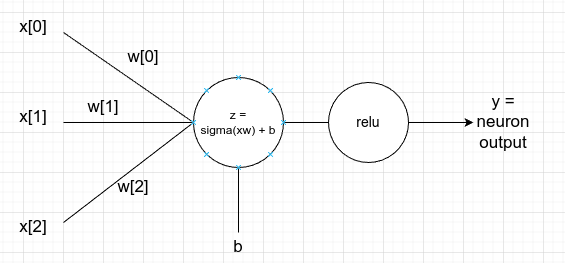

Now let us perform forward pass first.

In [1]:
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

z = xw0 + xw1 + xw2 + b

y = max(z, 0)

print(f'neuron output = y = {y}')

neuron output = y = 6.0


here is what we just did.

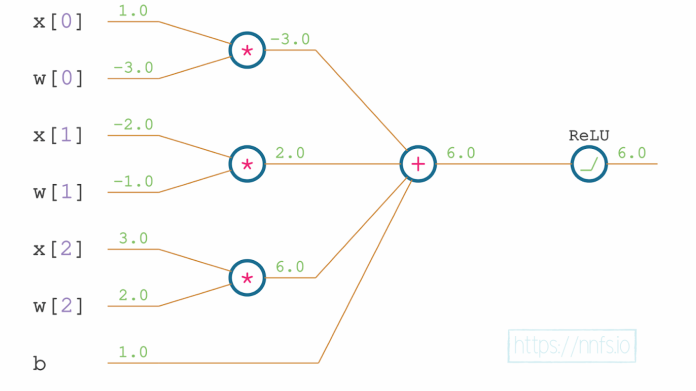

let's put all the forward pass into 1 formula

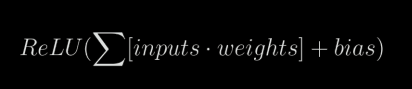

which is equal to

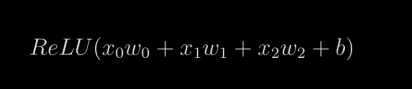

which is equal to

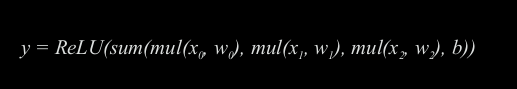

to calculate the impact of an element, say x0, to the output, we have to use chain rule

$$\frac{\delta}{\delta x_{0}} y$$

$$= \frac{\delta}{\delta x_{0}} ReLU[(x_{0}w_{0}) + (x_{1}w_{1}) + (x_{2}w_{2}) + b]$$

$$= \frac{\delta}{\delta x_{0}} ReLU[sum(mul(x_{0}w_{0}), mul(x_{1}w_{1}), mul(x_{2}w_{3}), b)]$$

$$= \frac{\delta}{\delta sum(...)}ReLU * \frac{\delta}{\delta mul(...)}sum(...)* \frac{\delta}{\delta x_{0}}mul(x_{0}w_{0})$$

**we repeat this calculation to remaining impacts (x1, x2, w0, w1, w2, b)**

- The derivatives with respect to the weights and a bias will inform us about
their impact and will be used to update these weights and bias. 

- The derivatives with respect to
inputs are used to chain more layers by passing them to the previous function in the chain.

The derivative with respect to the layer’s inputs, as opposed to the derivative
with respect to the weights and biases, is not used to update any parameters. Instead, it is used to
chain to another layer (which is why we backpropagate to the previous layer in a chain).

Let's assume that our neuron receives a gradient of 1 from the next layer.

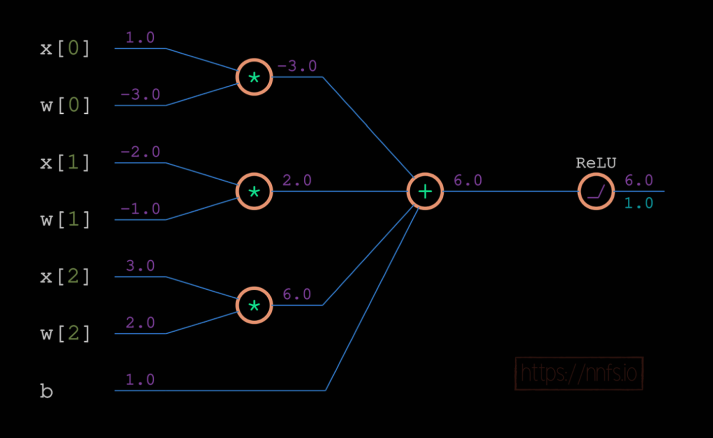

In [2]:
# FORWARD PASS

x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias

# mul operation
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# sum operation
z = xw0 + xw1 + xw2 + b

# relu operation
y = max(z, 0)

y

6.0

now remember, we have to do this operation
$$= \frac{\delta}{\delta sum(...)}ReLU * \frac{\delta}{\delta mul(...)}sum(...)* \frac{\delta}{\delta x_{0}}mul(x_{0}w_{0})$$

to all variable, not just x0

# Wall Through Backpropagation

In [3]:
# BACKWARD PASS

# the derivative received from the next layer
dvalue = 1.0

here is us now.
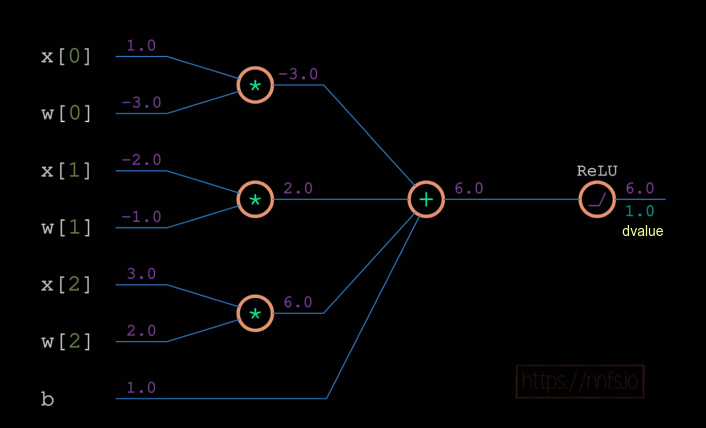

In [4]:
drelu_dsum = dvalue * (1. if z > 0 else 0.)
drelu_dsum

1.0

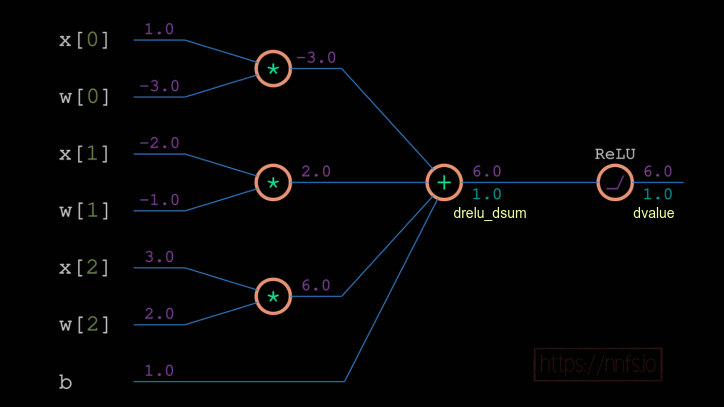

In [5]:
dsum_dxw0 = 1 # the derivative of a sum operation is always 1
dsum_dxw1 = 1 # the derivative of a sum operation is always 1
dsum_dxw2 = 1 # the derivative of a sum operation is always 1
dsum_db = 1 # the derivative of a sum operation is always 1

# then, multiply with subsequent opeartion
drelu_dxw0 = drelu_dsum * dsum_dxw0
drelu_dxw1 = drelu_dsum * dsum_dxw1
drelu_dxw2 = drelu_dsum * dsum_dxw2
drelu_db = drelu_dsum * dsum_db

drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db

(1.0, 1.0, 1.0, 1.0)

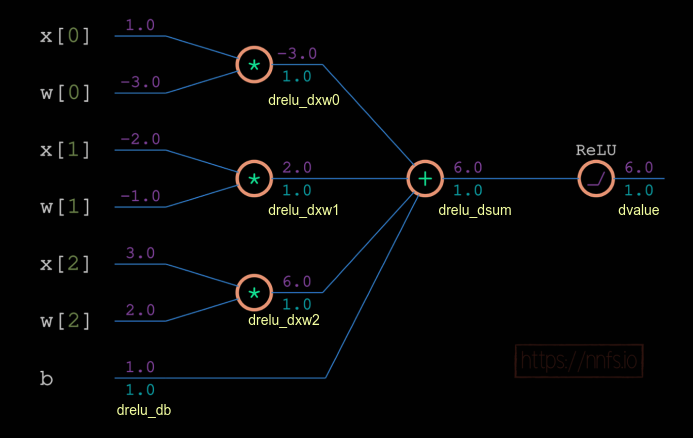

In [6]:
dmul_dx0 = w[0] # d/dx0 (x0w0)
dmul_dx1 = w[1] # d/dx1 (x1w1)
dmul_dx2 = w[2] # d/dx2 (x2w2)

dmul_dw0 = x[0] # d/dw0 (x0w0)
dmul_dw1 = x[1] # d/dw1 (x1w1)
dmul_dw2 = x[2] # d/dw2 (x2w2)

# multiply them with subsequent gradient
drelu_dx0 = dmul_dx0 * drelu_dxw0
drelu_dx1 = dmul_dx1 * drelu_dxw1
drelu_dx2 = dmul_dx2 * drelu_dxw2

drelu_dw0 = dmul_dw0 * drelu_dxw0
drelu_dw1 = dmul_dw1 * drelu_dxw1
drelu_dw2 = dmul_dw2 * drelu_dxw2

print(drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

-3.0 1.0 -1.0 -2.0 2.0 3.0


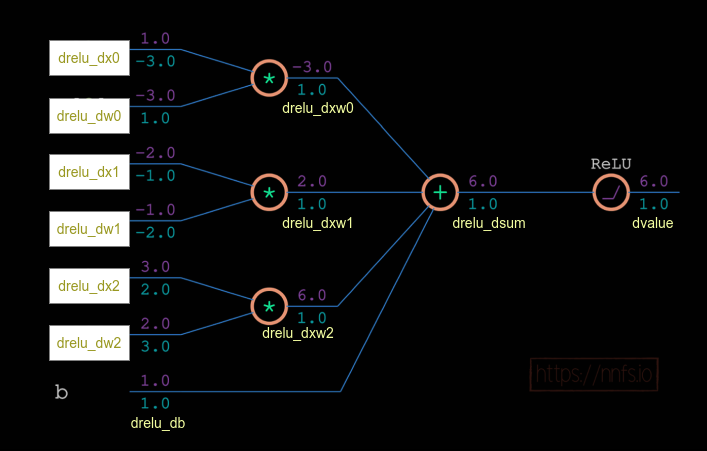

let's take one function and simplify them

`drelu_dx0 ​= ​drelu_dxw0 ​* ​dmul_dx0`

where `dmul_dx0 = w[0]`

`drelu_dx0 ​= ​drelu_dxw0 ​* w[0]`

where `​drelu_dxw0 = drelu_dsum * dsum_dxw0`

`drelu_dx0 ​= drelu_dsum * dsum_dxw0 ​* w[0]`

where `dsum_dxw0 = 1`

`drelu_dx0 ​= drelu_dsum * 1 ​* w[0]`

where `drelu_dsum = dvalue * (1. if z > 0 else 0.)`

`drelu_dx0 ​= dvalue * (1. if z > 0 else 0.) * 1 ​* w[0]`

from the left:
- partial der of next layer 
- partial der of relu
- partial der of sum
- partial der of mul

All together, the partial derivatives above, combined into a vector, make up our gradients. Our
gradients could be represented as:<br />
$dx ​= ​[drelu\_dx0, drelu\_dx1, drelu\_dx2]$ ​# gradients on inputs <br />
$dw ​= ​[drelu\_dw0, drelu\_dw1, drelu\_dw2]$ ​# gradients on weights <br />
$db ​= ​drelu\_db$ ​# gradient on bias...just 1 bias here. <br />

We can now apply these gradients to the weights to
minimize the output. *This is typically the purpose of the​ optimizer* ​(discussed in the
following chapter), but we can show a simplified version of this task by directly applying a
negative fraction of the gradient to our weights. 

We apply a negative fraction to this gradient
since we want to decrease the final output value, and the gradient shows the direction of the
steepest ascent.

In [7]:
print(w, b)

dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs
dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights
db = drelu_db # gradient on bias...just 1 bias here.
# apply a fraction of the gradients

w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db

print(w, b)

[-3.0, -1.0, 2.0] 1.0
[-3.001, -0.998, 1.997] 0.999


Now we redo the forward pass.

In [8]:
# FORWARD PASS

# mul operation
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# sum operation
z = xw0 + xw1 + xw2 + b

# relu operation
y = max(z, 0)
y

5.985

We’ve successfully decreased this neuron’s output from 6.000 to 5.985. **Note that it does not
make sense to decrease the neuron’s output in a real neural network; we were doing this purely as
a simpler exercise than the full network.**

# Full Layer

- 3 samples, each with 4 features
- 1 hidden layer, 3 neurons, each with 4 weights and 1 biases

In [9]:
import numpy as np

# gradient from the next layer
dvalues= np.array([[1., 1., 1.]])

# weights
weights= np.array([[0.2, 0.8, -0.5, 1], # weight set of neuron 1
                   [0.5, -0.91, 0.26, -0.5], # weight set of neuron 2
                   [-0.26, -0.27, 0.17, 0.87]]).T # weight set of neuron 3

print(weights[0])
print(weights[1])
print(weights[2])
print(weights[3])

[ 0.2   0.5  -0.26]
[ 0.8  -0.91 -0.27]
[-0.5   0.26  0.17]
[ 1.   -0.5   0.87]


each of those is weight of a given input.

In [10]:
# sum weights of a given input
dx0 = sum(weights[0] * dvalues[0]) # weights of input 1
dx1 = sum(weights[1] * dvalues[0]) # weights of input 2
dx2 = sum(weights[2] * dvalues[0]) # weights of input 3
dx3 = sum(weights[3] * dvalues[0]) # weights of input 4

dinputs = np.array([dx0, dx1, dx2, dx3])
dinputs

array([ 0.44, -0.38, -0.07,  1.37])

we obtain the same with np.dot. however, we need to make the inner shape identical.

In [11]:
print(dvalues.shape)
print(dvalues)

print('\n')

print(weights.shape)
print(weights)

(1, 3)
[[1. 1. 1.]]


(4, 3)
[[ 0.2   0.5  -0.26]
 [ 0.8  -0.91 -0.27]
 [-0.5   0.26  0.17]
 [ 1.   -0.5   0.87]]


In [12]:
np.dot(dvalues[0], weights.T)

array([ 0.44, -0.38, -0.07,  1.37])